In [1]:
import numpy as np
import matplotlib.pyplot as plt
from filtered_point_process.model import Model

/Users/patrick_bloniasz/filtered-point-process/filtered_point_process/cif/Spectral_Gaussian.py:111: UserWarning: 43 values in the intensity were negative after adding lambda_0 and have been set to zero. Consider increasing lambda_0. Given your simulation parameters we recommend a value of at least [31.16233655] for lambda_0
  UserWarning,


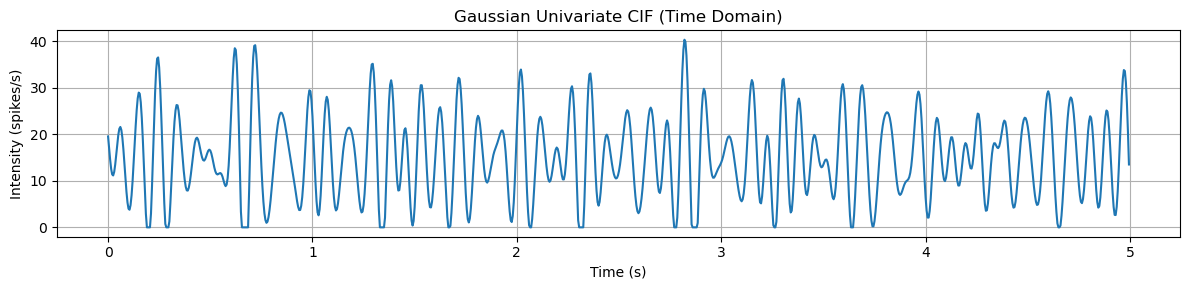

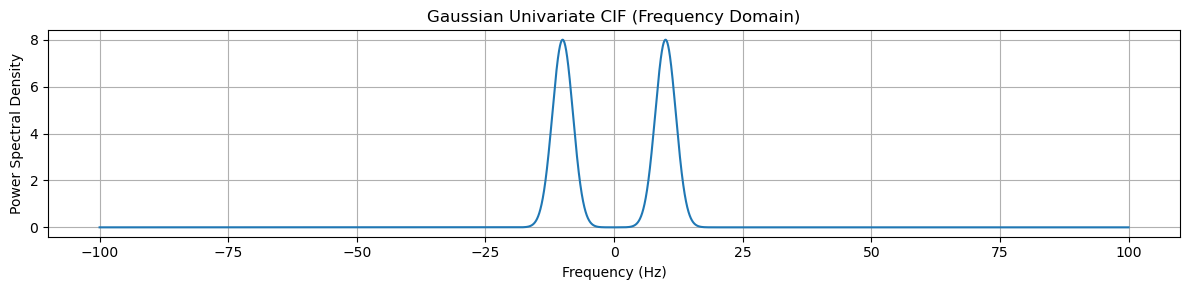

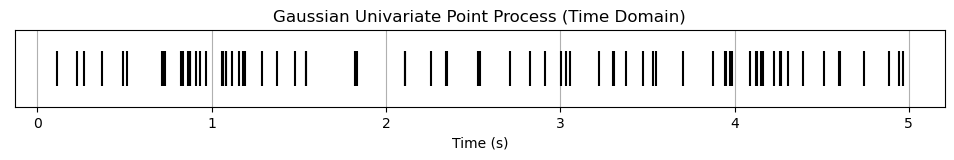

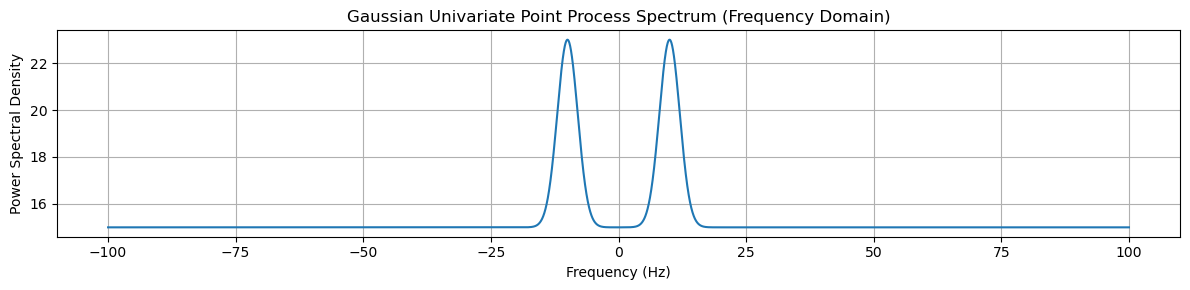

In [2]:
# Define model parameters
model_name = "gaussian"
model_params = {
    "peak_height": [8],
    "center_frequency": [10],  # Hz
    "peak_width": [2],  # Hz
    "lambda_0": [15],
}
simulation_params = {
    "fs": 200,  # Sampling frequency in Hz
    "T": 5,  # Total time in seconds
    "simulate": True,
    "seed": 1,  # For reproducibility
}

# Create and simulate the model
model = Model(
    model_name=model_name,
    model_params=model_params,
    simulation_params=simulation_params,
)
spikes = model.spikes

# Access CIF time axis and realization
time_axis = model.cif.cif_time_axis
intensity = model.cif.cif_realization.squeeze()

# Plot CIF in Time Domain
plt.figure(figsize=(12, 3))
plt.plot(time_axis, intensity)
plt.title("Gaussian Univariate CIF (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Intensity (spikes/s)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot CIF in Frequency Domain
frequencies = model.cif.frequencies
PSD = model.cif.PSD
plt.figure(figsize=(12, 3))
plt.plot(frequencies, PSD)
plt.title("Gaussian Univariate CIF (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Point Process in Time Domain
plt.figure(figsize=(12, 1))
plt.eventplot(spikes, colors="black")
plt.title("Gaussian Univariate Point Process (Time Domain)")
plt.xlabel("Time (s)")
plt.yticks([])
plt.grid(True)
plt.show()

# Compute and Plot Point Process Spectrum
pp_PSD = model.pp.frequency_domain.get_PSD()
plt.figure(figsize=(12, 3))
plt.plot(frequencies, pp_PSD)
plt.title("Gaussian Univariate Point Process Spectrum (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.grid(True)
plt.tight_layout()
plt.show()

## AR(2)

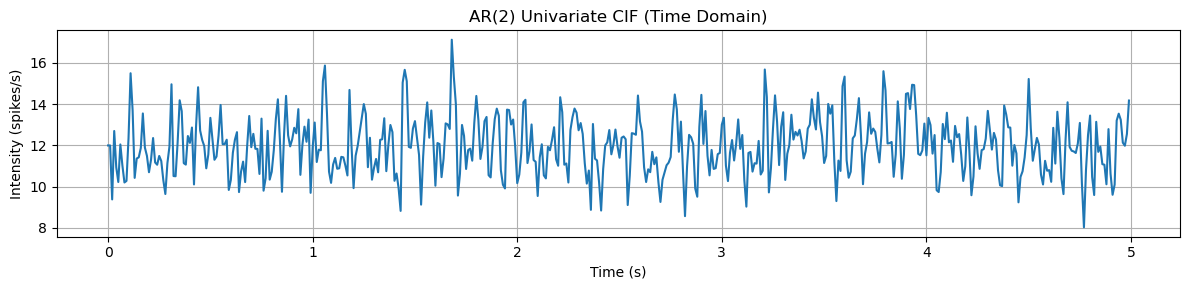

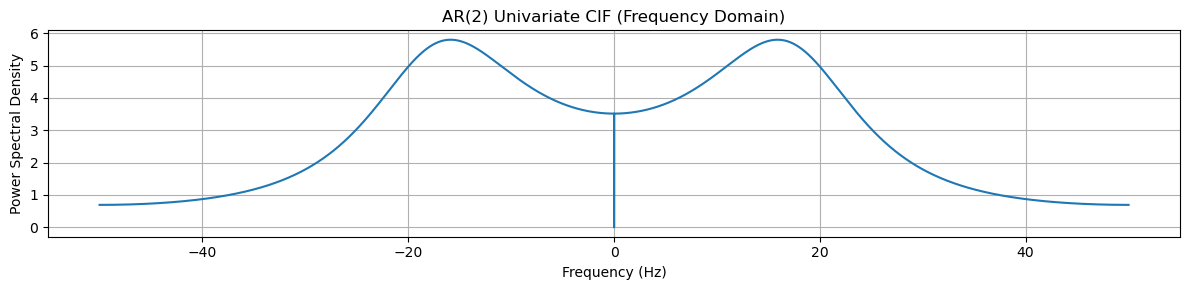

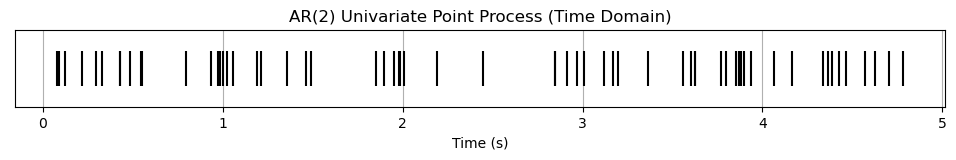

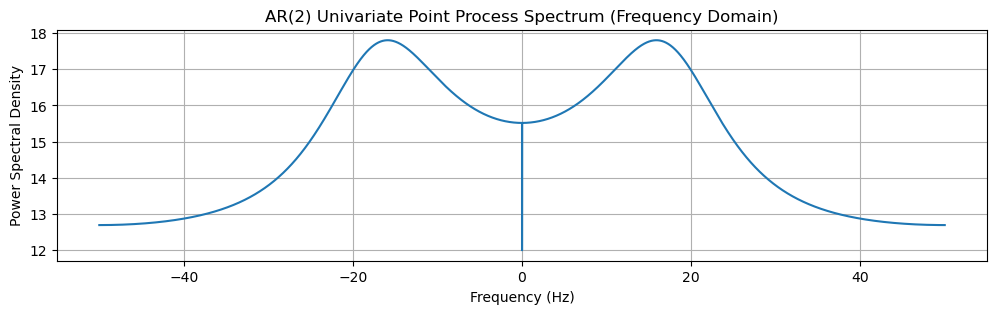

In [3]:
# Define model parameters
model_name = "ar"
model_params = {"ar_coeffs": [0.5, -0.3], "white_noise_variance": 1.5, "lambda_0": 12}
simulation_params = {
    "fs": 100,  # Sampling frequency in Hz
    "T": 5,  # Total time in seconds
    "simulate": True,
    "seed": 2,  # For reproducibility
}

# Create and simulate the model
model = Model(model_name, model_params, simulation_params)
spikes = model.spikes

# Access CIF time axis and realization
time_axis = model.cif.cif_time_axis
intensity = model.cif.cif_realization.squeeze()

# Plot CIF in Time Domain
plt.figure(figsize=(12, 3))
plt.plot(time_axis, intensity)
plt.title("AR(2) Univariate CIF (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Intensity (spikes/s)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot CIF in Frequency Domain
frequencies = model.cif.frequencies
PSD = model.cif.PSD
plt.figure(figsize=(12, 3))
plt.plot(frequencies, PSD)
plt.title("AR(2) Univariate CIF (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Point Process in Time Domain
plt.figure(figsize=(12, 1))
plt.eventplot(spikes, colors="black")
plt.title("AR(2) Univariate Point Process (Time Domain)")
plt.xlabel("Time (s)")
plt.yticks([])
plt.grid(True)
plt.show()

# Compute and Plot Point Process Spectrum
pp_PSD = model.pp.frequency_domain.get_PSD()
plt.figure(figsize=(12, 3))
plt.plot(frequencies, pp_PSD)
plt.title("AR(2) Univariate Point Process Spectrum (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.grid(True)

plt.show()

## Homogeneous Poisson Univariate Point Process

/Users/patrick_bloniasz/filtered-point-process/filtered_point_process/cif/HomogeneousPoisson.py:44: UserWarning: The 'CIF' of a homogeneous process is its constant intensity.As such, the spectrum of the 'CIF' of a Homo. Pois. process andThe spectrum at the level of the point process is identical.
  UserWarning,


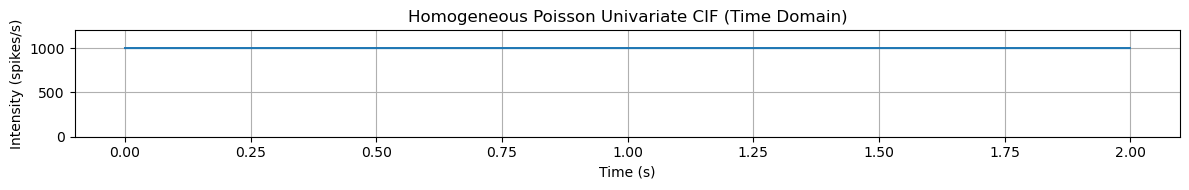

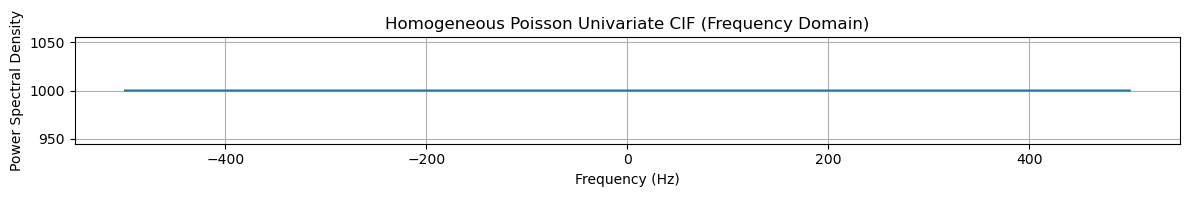

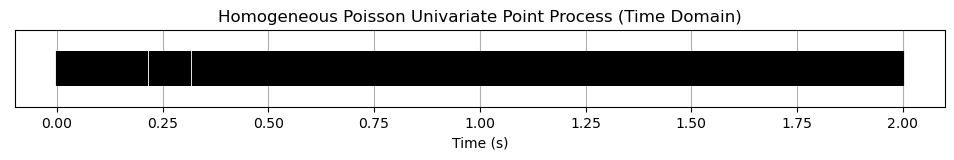

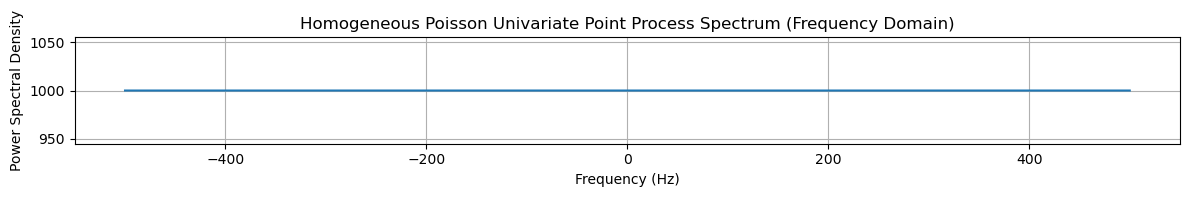

In [4]:
# Define model parameters
model_name = "homogeneous_poisson"
model_params = {"lambda_0": 1000}  # Constant rate
simulation_params = {
    "fs": 1000,  # Sampling frequency in Hz
    "T": 2,  # Total time in seconds
    "simulate": True,
    "seed": 3,  # For reproducibility
}

# Create and simulate the model
model = Model(model_name, model_params, simulation_params)
spikes = model.spikes

# Access CIF time axis and realization
time_axis = model.cif.cif_time_axis
intensity = model.cif.cif_realization.squeeze()

# Plot CIF in Time Domain
plt.figure(figsize=(12, 2))
plt.plot(time_axis, intensity)
plt.title("Homogeneous Poisson Univariate CIF (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Intensity (spikes/s)")
plt.ylim([0, model_params["lambda_0"] * 1.2])
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot CIF in Frequency Domain
frequencies = model.cif.frequencies
PSD = model.cif.PSD
plt.figure(figsize=(12, 2))
plt.plot(frequencies, PSD)
plt.title("Homogeneous Poisson Univariate CIF (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Point Process in Time Domain
plt.figure(figsize=(12, 1))
plt.eventplot(spikes, colors="black")
plt.title("Homogeneous Poisson Univariate Point Process (Time Domain)")
plt.xlabel("Time (s)")
plt.yticks([])
plt.grid(True)
plt.show()

# Since the CIF is constant, the point process spectrum is flat
pp_PSD = model.pp.frequency_domain.get_PSD()
plt.figure(figsize=(12, 2))
plt.plot(frequencies, pp_PSD)
plt.title("Homogeneous Poisson Univariate Point Process Spectrum (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.grid(True)
plt.tight_layout()
plt.show()

## 4) Homogeneous Poisson Multivariate Point Process


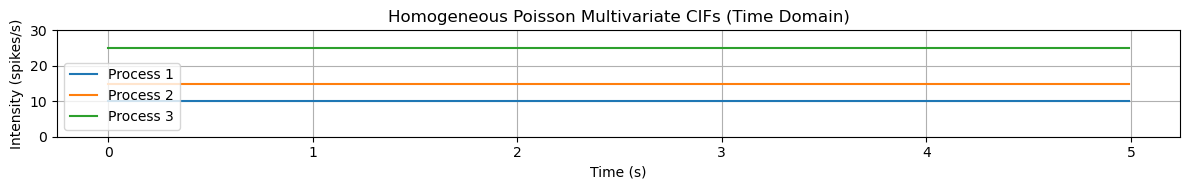

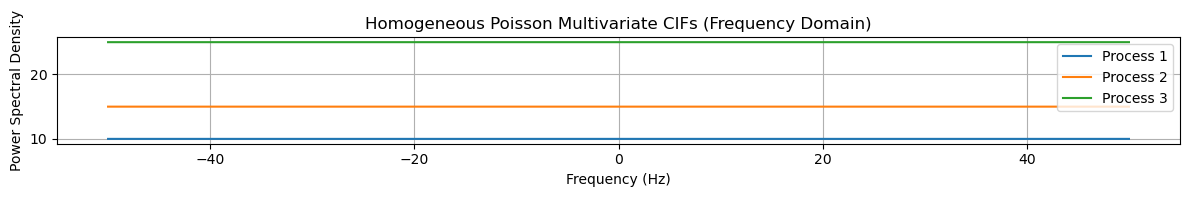

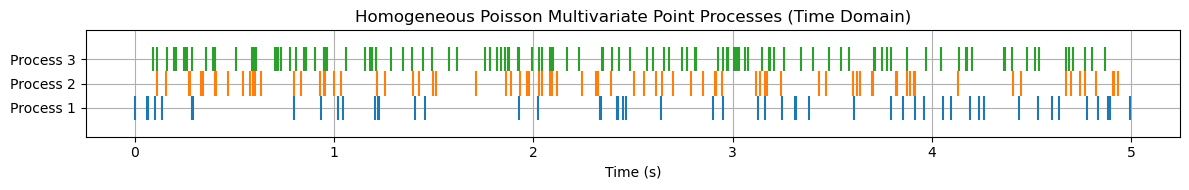

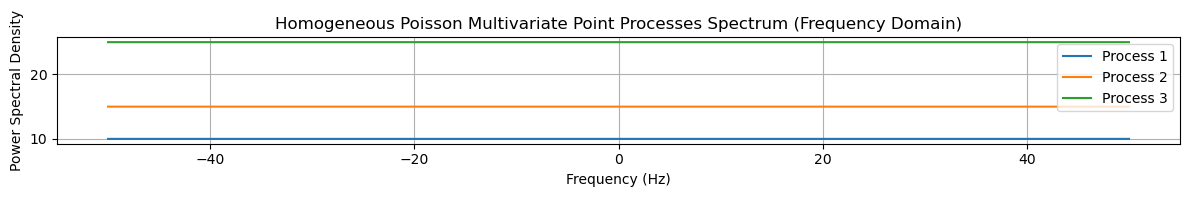

In [5]:
# Define model parameters
num_processes = 3
cif_types = ["HomogeneousPoisson"] * num_processes
cif_params = [{"lambda_0": 10}, {"lambda_0": 15}, {"lambda_0": 25}]
simulation_params = {
    "fs": 100,
    "T": 5,
    "simulate": True,
    "seed": 4,
    "dependence": "independent",
}

# Create and simulate the model
model = Model(
    "multivariate_homogeneous_poisson",
    {
        "num_processes": num_processes,
        "cif_types": cif_types,
        "cif_params": cif_params,
    },
    simulation_params,
)
spikes = model.spikes

# Plot CIFs in Time Domain
plt.figure(figsize=(12, 2))
for i in range(num_processes):
    time_axis = model.cif.cifs[i].cif_time_axis
    intensity = model.cif.cifs[i].cif_realization.squeeze()
    plt.plot(time_axis, intensity, label=f"Process {i+1}")
plt.title("Homogeneous Poisson Multivariate CIFs (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Intensity (spikes/s)")
plt.legend()
plt.ylim([0, max([p["lambda_0"] for p in cif_params]) * 1.2])
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot CIFs in Frequency Domain
frequencies = model.cif.get_frequencies()
PSD_list = model.cif.get_spectra()
plt.figure(figsize=(12, 2))
for i in range(num_processes):
    PSD = PSD_list[i]
    plt.plot(frequencies, PSD, label=f"Process {i+1}")
plt.title("Homogeneous Poisson Multivariate CIFs (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Point Processes in Time Domain
plt.figure(figsize=(12, 2))
for i in range(num_processes):
    spikes_i = spikes[i]
    plt.eventplot(spikes_i, lineoffsets=i + 1, colors=f"C{i}")
plt.title("Homogeneous Poisson Multivariate Point Processes (Time Domain)")
plt.xlabel("Time (s)")
plt.yticks(
    range(1, num_processes + 1), [f"Process {i+1}" for i in range(num_processes)]
)
plt.grid(True)
plt.tight_layout()
plt.show()

# Since the CIFs are constant, the point process spectra are flat
pp_PSD_list = model.pp.frequency_domain.get_PSD()
plt.figure(figsize=(12, 2))
for i in range(num_processes):
    pp_PSD = pp_PSD_list[i]
    plt.plot(frequencies, pp_PSD, label=f"Process {i+1}")
plt.title(
    "Homogeneous Poisson Multivariate Point Processes Spectrum (Frequency Domain)"
)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 5) Gaussian Multivariate Dependent Point Processes with Weights [0.5, -0.5]

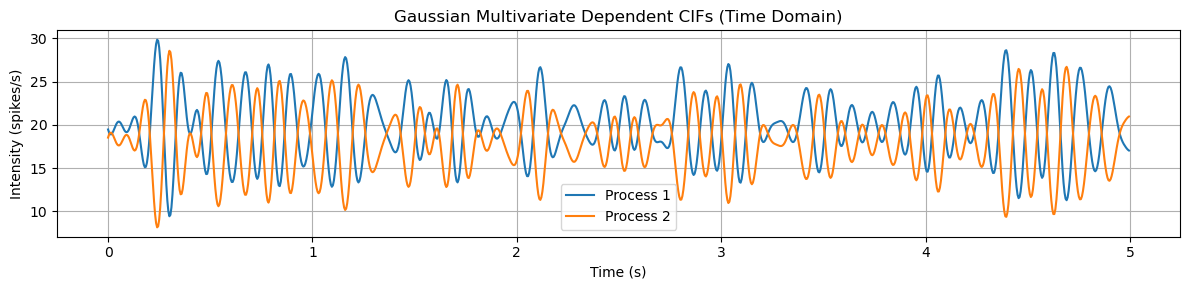

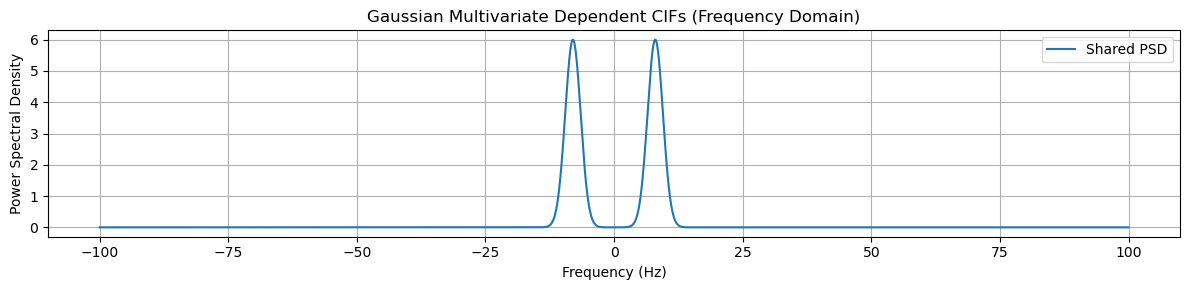

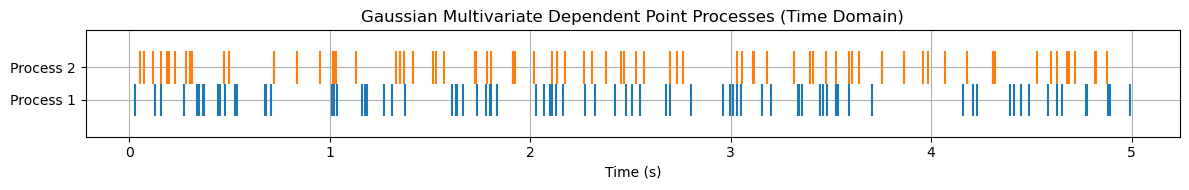

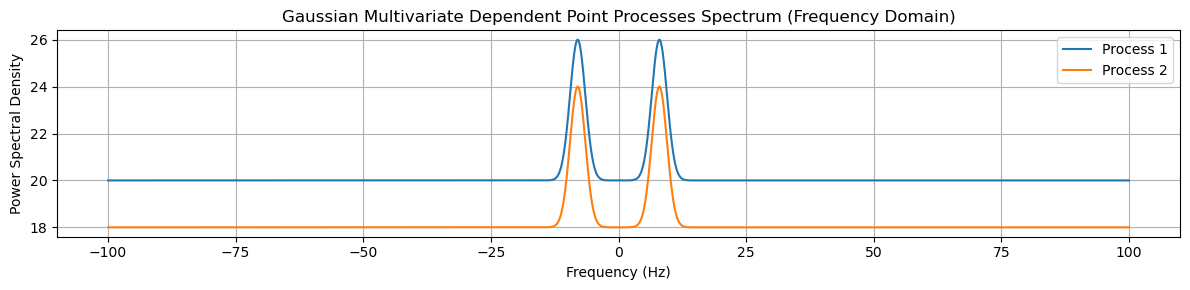

In [6]:
# Define model parameters with the same spectral parameters
num_processes = 2
cif_types = ["Gaussian", "Gaussian"]
common_cif_params = {
    "peak_height": [6],
    "center_frequency": [8],  # Hz
    "peak_width": [1.5],  # Hz
}

# Each process can have a different lambda_0
cif_params = [
    {**common_cif_params, "lambda_0": 20},
    {**common_cif_params, "lambda_0": 18},
]

weights = [0.5, -0.5]
simulation_params = {
    "fs": 200,
    "T": 5,
    "simulate": True,
    "seed": 5,
    "dependence": "dependent",
    "weights": weights,
}

# Create and simulate the model
model = Model(
    "multivariate_gaussian",
    {
        "num_processes": num_processes,
        "cif_types": cif_types,
        "cif_params": cif_params,
    },
    simulation_params,
)
spikes = model.spikes

# Plot CIFs in Time Domain
plt.figure(figsize=(12, 3))
for i in range(num_processes):
    time_axis = model.cif.cifs[i].cif_time_axis
    intensity = model.cif.cifs[i].cif_realization.squeeze()
    plt.plot(time_axis, intensity, label=f"Process {i+1}")
plt.title("Gaussian Multivariate Dependent CIFs (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Intensity (spikes/s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot CIFs in Frequency Domain
frequencies = model.cif.get_frequencies()
PSD = model.cif.spectra[0]  # All spectra are the same
plt.figure(figsize=(12, 3))
plt.plot(frequencies, PSD, label="Shared PSD")
plt.title("Gaussian Multivariate Dependent CIFs (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Point Processes in Time Domain
plt.figure(figsize=(12, 2))
for i in range(num_processes):
    spikes_i = spikes[0][i]  # First simulation
    plt.eventplot(spikes_i, lineoffsets=i + 1, colors=f"C{i}")
plt.title("Gaussian Multivariate Dependent Point Processes (Time Domain)")
plt.xlabel("Time (s)")
plt.yticks(
    range(1, num_processes + 1), [f"Process {i+1}" for i in range(num_processes)]
)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Point Process Spectra
pp_PSD_list = model.pp.frequency_domain.get_PSD()
plt.figure(figsize=(12, 3))
for i in range(num_processes):
    pp_PSD = pp_PSD_list[i]
    plt.plot(frequencies, pp_PSD, label=f"Process {i+1}")
plt.title("Gaussian Multivariate Dependent Point Processes Spectrum (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 6) Gaussian Multivariate Independent Point Processes


/Users/patrick_bloniasz/filtered-point-process/filtered_point_process/cif/Spectral_Gaussian.py:111: UserWarning: 4 values in the intensity were negative after adding lambda_0 and have been set to zero. Consider increasing lambda_0. Given your simulation parameters we recommend a value of at least 23.637751983845217 for lambda_0
  UserWarning,


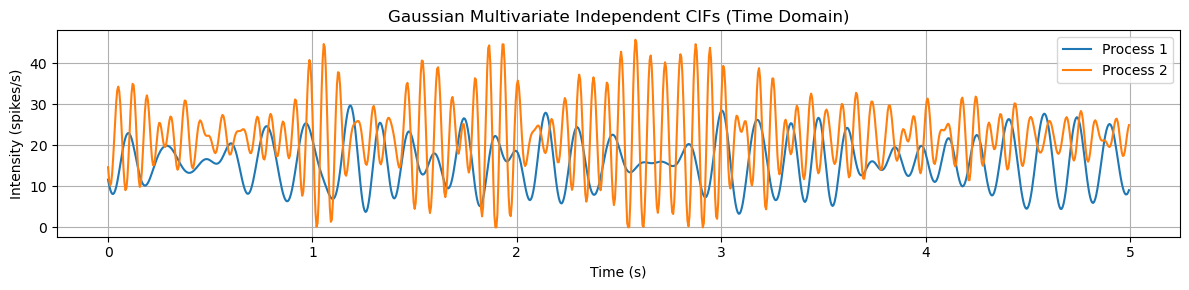

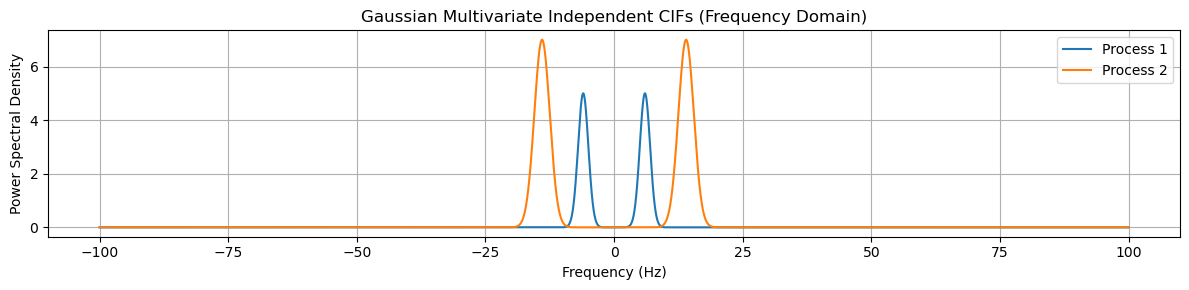

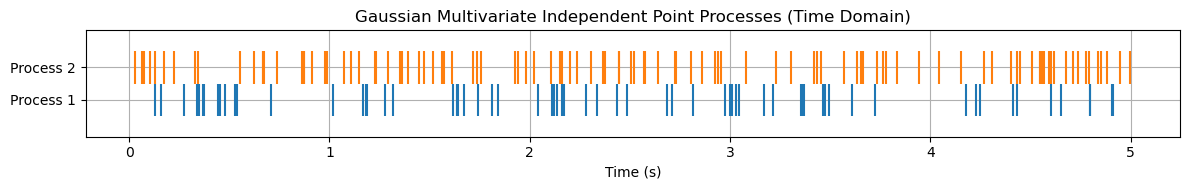

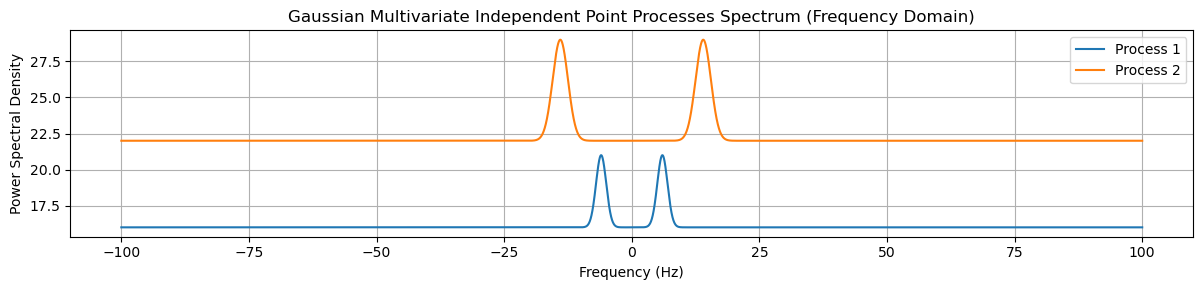

In [7]:
# Define model parameters
num_processes = 2
cif_types = ["Gaussian", "Gaussian"]
cif_params = [
    {
        "peak_height": [5],
        "center_frequency": [6],  # Hz
        "peak_width": [1],  # Hz
        "lambda_0": 16,
    },
    {
        "peak_height": [7],
        "center_frequency": [14],  # Hz
        "peak_width": [1.5],  # Hz
        "lambda_0": 22,
    },
]
simulation_params["dependence"] = "independent"
simulation_params.pop("weights", None)  # Remove weights from the previous model

# Create and simulate the model
model = Model(
    "multivariate_gaussian",
    {
        "num_processes": num_processes,
        "cif_types": cif_types,
        "cif_params": cif_params,
    },
    simulation_params,
)
spikes = model.spikes

# Plot CIFs in Time Domain
plt.figure(figsize=(12, 3))
for i in range(num_processes):
    time_axis = model.cif.cifs[i].cif_time_axis
    intensity = model.cif.cifs[i].cif_realization.squeeze()
    plt.plot(time_axis, intensity, label=f"Process {i+1}")
plt.title("Gaussian Multivariate Independent CIFs (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Intensity (spikes/s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot CIFs in Frequency Domain
frequencies = model.cif.get_frequencies()
PSD_list = model.cif.get_spectra()
plt.figure(figsize=(12, 3))
for i in range(num_processes):
    PSD = PSD_list[i]
    plt.plot(frequencies, PSD, label=f"Process {i+1}")
plt.title("Gaussian Multivariate Independent CIFs (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Point Processes in Time Domain
plt.figure(figsize=(12, 2))
for i in range(num_processes):
    spikes_i = spikes[0][i]  # First simulation
    plt.eventplot(spikes_i, lineoffsets=i + 1, colors=f"C{i}")
plt.title("Gaussian Multivariate Independent Point Processes (Time Domain)")
plt.xlabel("Time (s)")
plt.yticks(
    range(1, num_processes + 1), [f"Process {i+1}" for i in range(num_processes)]
)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Point Process Spectra
pp_PSD_list = model.pp.frequency_domain.get_PSD()
plt.figure(figsize=(12, 3))
for i in range(num_processes):
    pp_PSD = pp_PSD_list[i]
    plt.plot(frequencies, pp_PSD, label=f"Process {i+1}")
plt.title(
    "Gaussian Multivariate Independent Point Processes Spectrum (Frequency Domain)"
)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()